# Plot animation

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Query

# Temporal evolution

In [2]:
START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q.prepare_query(
    'plot_animation.sql'
    ,params=params
    ,to_load_file='plot_animation'
    ,load_from_to_load_file='plot_animation'
)

orders  = q.query_run_starburst()

orders['p_creation_date'] = pd.to_datetime(orders['p_creation_date'])

In [3]:
orders

,p_creation_date,n_orders,n_customers
0,2024-01-01,610009,543436
1,2024-01-02,659340,580890
2,2024-01-03,673487,595974
3,2024-01-04,690514,611920
4,2024-01-05,767205,676534
...,...,...,...
209,2024-07-28,877660,767717
210,2024-07-29,735122,640280
211,2024-07-30,738348,643835
212,2024-07-31,770190,672787


Test


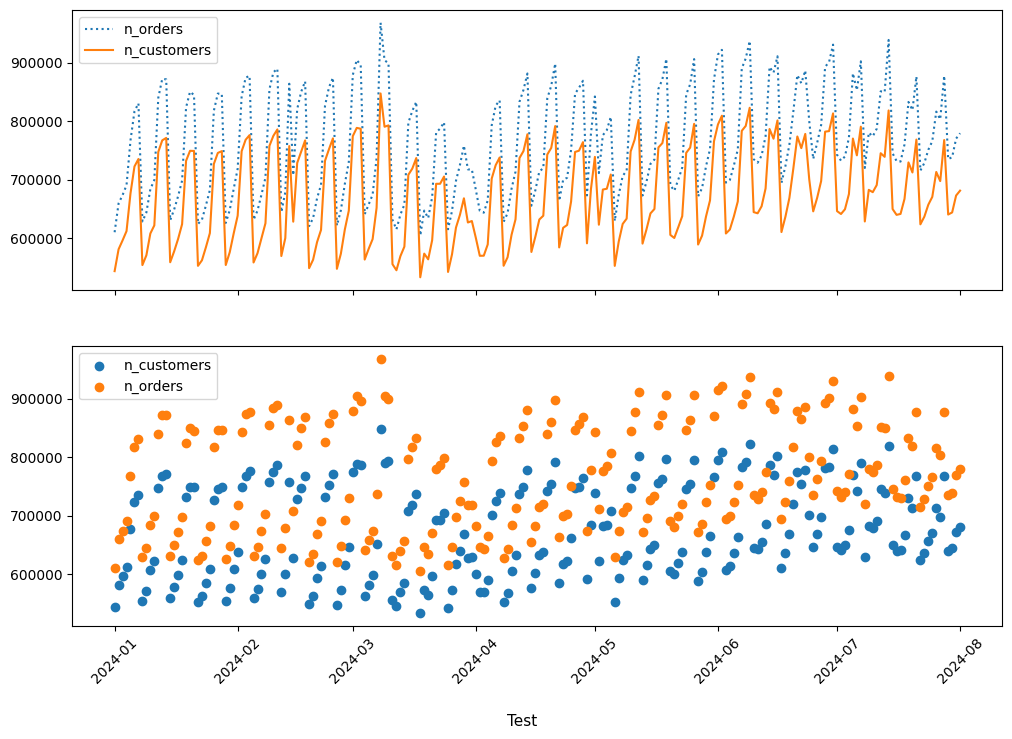

In [4]:
# Initialize the DataFrameVisualizer with the orders DataFrame
v = dataframe_visualizer.DataFrameVisualizer(orders)

# Define plot configurations for two subplots
plot_params = [
    {
        'plot_type': 'lineplot',
        'x_column': 'p_creation_date',
        'y_columns': ['n_orders', 'n_customers'],
        'legend': True,
        'colors': ['blue', 'orange'],
        'styles': [':', '-']
    },
    {
        'plot_type': 'scatterplot',
        'x_column': 'p_creation_date',
        'y_columns': ['n_customers', 'n_orders'],
        'legend': True,
        'colors': ['blue', 'orange'],
        'styles': [':', '-']
    },
]

# Define figure parameters
figure_params = {
    'n_plots': 2,
    'fig_length': 12,  
    'fig_height': 8,   
    'x_rotation': 45,  
    'x_limits': None,  
    'y_limits': None,  
    'share_x': True,   
    'share_y': True,   
    'title': 'Test'
}

# Create the static plot
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)